# **EDA_Visualization**

### **Objective:**
The goal of this notebook is to perform a deep-dive analysis into the supermarket sales data. We aim to:
1. Understand **Sales Trends** over time.
2. Identify **Top Performing Categories** and Items.
3. Analyze the impact of **Pricing** and **Loss Rates** on total sales.
4. Prepare the data for the final Predictive Modeling stage.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url1 = 'https://raw.githubusercontent.com/Zuha-Wasfi/Supermarket-Sales-Prediction/main/Data/final_data_part1.csv'
url2 = 'https://raw.githubusercontent.com/Zuha-Wasfi/Supermarket-Sales-Prediction/main/Data/final_data_part2.csv'

In [3]:
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
master_df = pd.concat([df1, df2])
print("Data loaded successfully!")

Data loaded successfully!


In [4]:
# Data Inspection
master_df.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name,Wholesale Price (RMB/kg),Loss Rate (%)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,2.10,22.27
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,Shanghaiqing,1011010101,Flower/Leaf Vegetables,7.03,14.43
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,Caixin,1011010101,Flower/Leaf Vegetables,4.60,13.70


In [5]:
# Checking for missing, dublicate values and data types
print("--- Data Info ---")
master_df.info()

print("\n--- Missing Values ---")
print(master_df.isnull().sum())

print("\n--- Duplicate Values ---")
print("Duplicate rows:", master_df.duplicated().sum())

print("\n--- Statistical Summary ---")
display(master_df.describe())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 878503 entries, 0 to 439250
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64
 5   Sale or Return               878503 non-null  object 
 6   Discount (Yes/No)            878503 non-null  object 
 7   Item Name                    878503 non-null  object 
 8   Category Code                878503 non-null  int64  
 9   Category Name                878503 non-null  object 
 10  Wholesale Price (RMB/kg)     878503 non-null  float64
 11  Loss Rate (%)                878503 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usa

,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Category Code,Wholesale Price (RMB/kg),Loss Rate (%)
count,8.785030e+05,878503.000000,878503.000000,8.785030e+05,878503.000000,878503.000000
mean,1.030313e+14,0.536112,8.917144,1.011010e+09,5.663150,10.122526
std,7.174368e+11,0.400087,6.311265,2.582929e+02,4.229638,4.741439
min,1.029000e+14,-9.082000,0.100000,1.011010e+09,0.010000,0.000000
25%,1.029000e+14,0.290000,4.900000,1.011010e+09,3.000000,6.270000
50%,1.029000e+14,0.435000,7.900000,1.011010e+09,4.690000,9.430000
75%,1.029000e+14,0.742000,10.800000,1.011011e+09,7.010000,13.620000
max,1.069740e+14,160.000000,119.900000,1.011011e+09,141.000000,29.250000


**Initial Observations:**

*The dataset contains 878,503 rows with no missing values and no duplicate entries (since it's preprocessed).*

*The Unit Price ranges from from 0.1 RMB/kg to 119.9 RMB/kg.*

*The average Loss Rate is approximately 10.12%, which is a key area for optimization.*

**1. Top Selling Categories:**

/tmp/ipython-input-2800793896.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


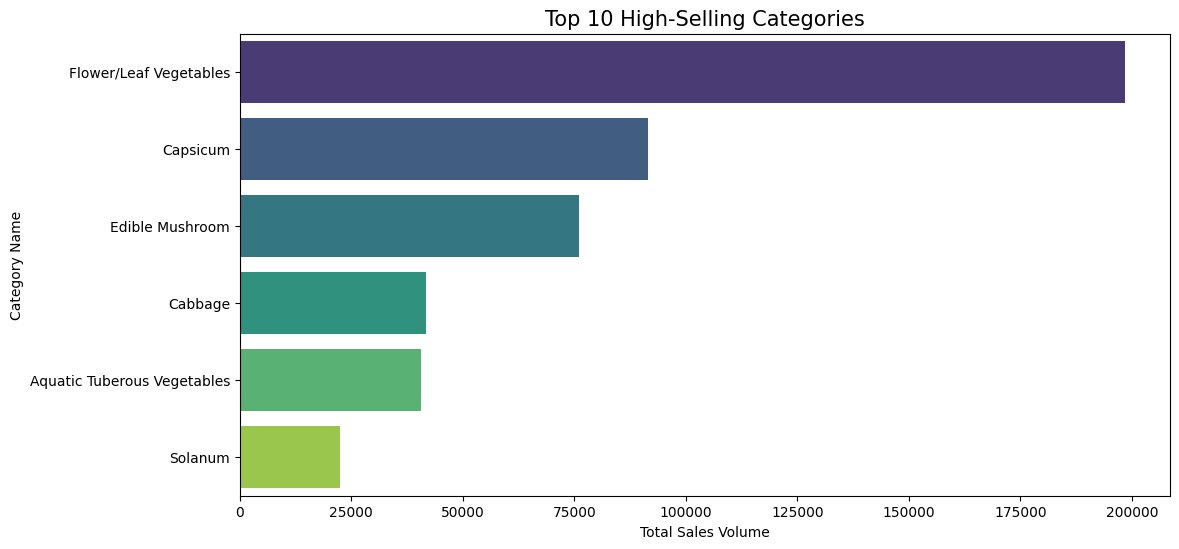

In [6]:
plt.figure(figsize=(12,6))
top_categories = master_df.groupby('Category Name')['Quantity Sold (kilo)'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 High-Selling Categories', fontsize=15)
plt.xlabel('Total Sales Volume')
plt.ylabel('Category Name')
plt.show()

**Insight 1:** *Sales are dominated by Flower/Leaf Vegetables, followed by Capsicum and Edible Mushroom, while other categories contribute comparatively lower volumes, indicating concentrated demand across categories.*

**2. Sales Trends (Time Analysis):**

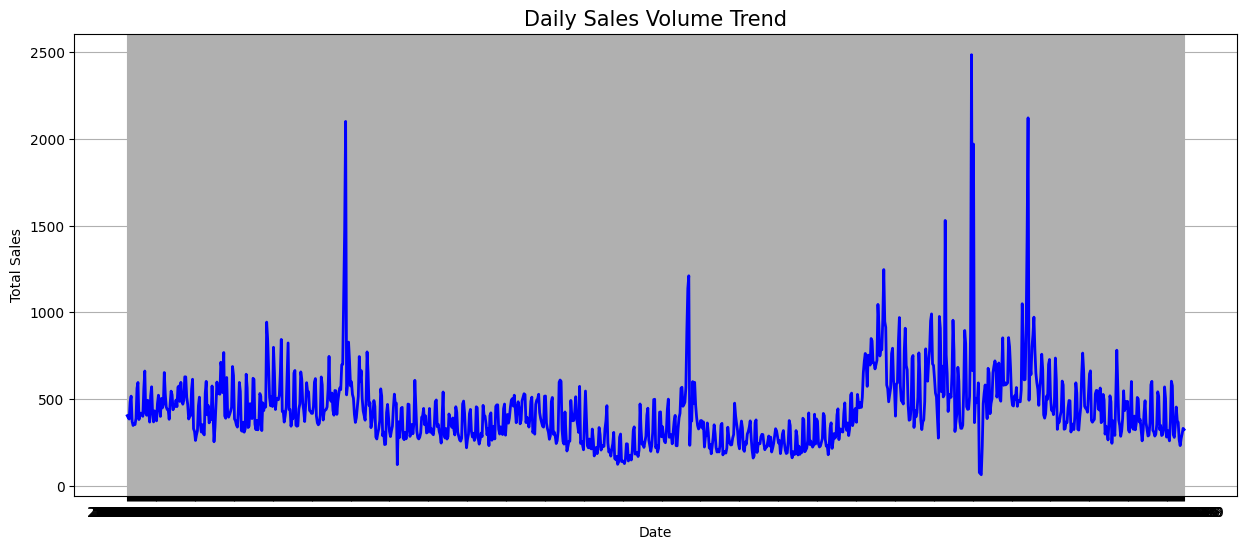

In [7]:
plt.figure(figsize=(15,6))
daily_sales = master_df.groupby('Date')['Quantity Sold (kilo)'].sum()
plt.plot(daily_sales.index, daily_sales.values, color='blue', linewidth=2)
plt.title('Daily Sales Volume Trend', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

**Insight 2:** *Sales volume varies across days with several peaks and dips, indicating fluctuating demand and the need for efficient inventory management.*

**3. Correlation Heatmap (Feature Relationships):**

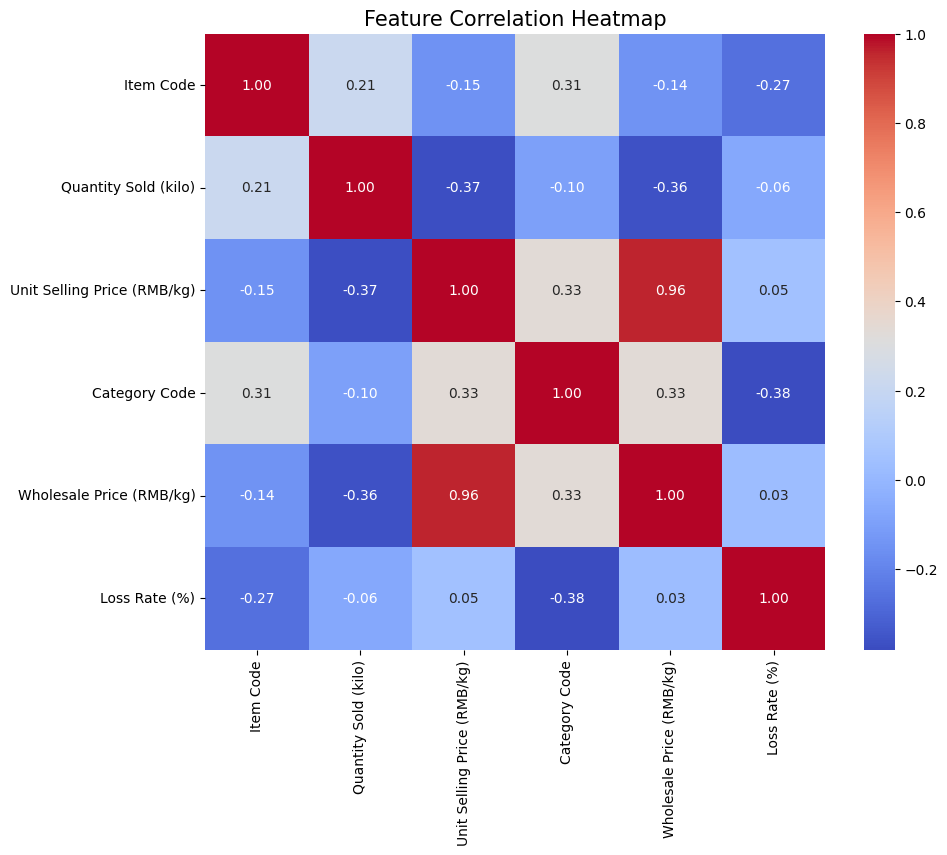

In [8]:
plt.figure(figsize=(10,8))
# Selecting only numeric columns for correlation
numeric_df = master_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=15)
plt.show()

**Insight 3:** *The correlation analysis shows a strong relationship between wholesale and selling prices, while quantity sold is negatively affected by higher prices. Loss rate is weakly related to price and varies mainly across categories.*

**4. Price vs Sales (Scatter Plot):**

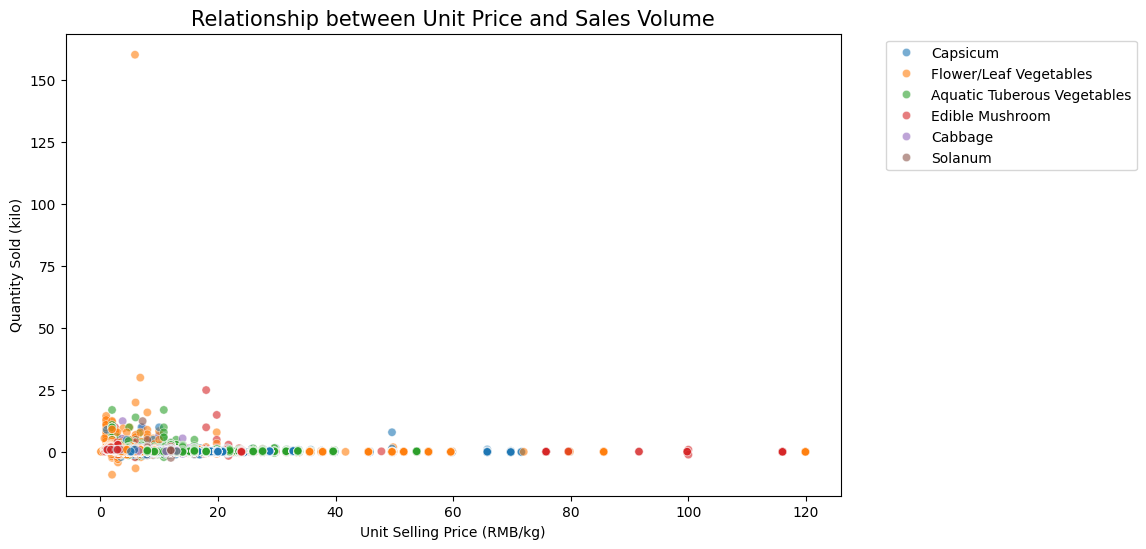

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=master_df, x='Unit Selling Price (RMB/kg)', y='Quantity Sold (kilo)', hue='Category Name', alpha=0.6)
plt.title('Relationship between Unit Price and Sales Volume', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**5. Loss Rate Analysis:**

/tmp/ipython-input-3151164200.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_loss_category.values, y=avg_loss_category.index, palette='Reds_r')


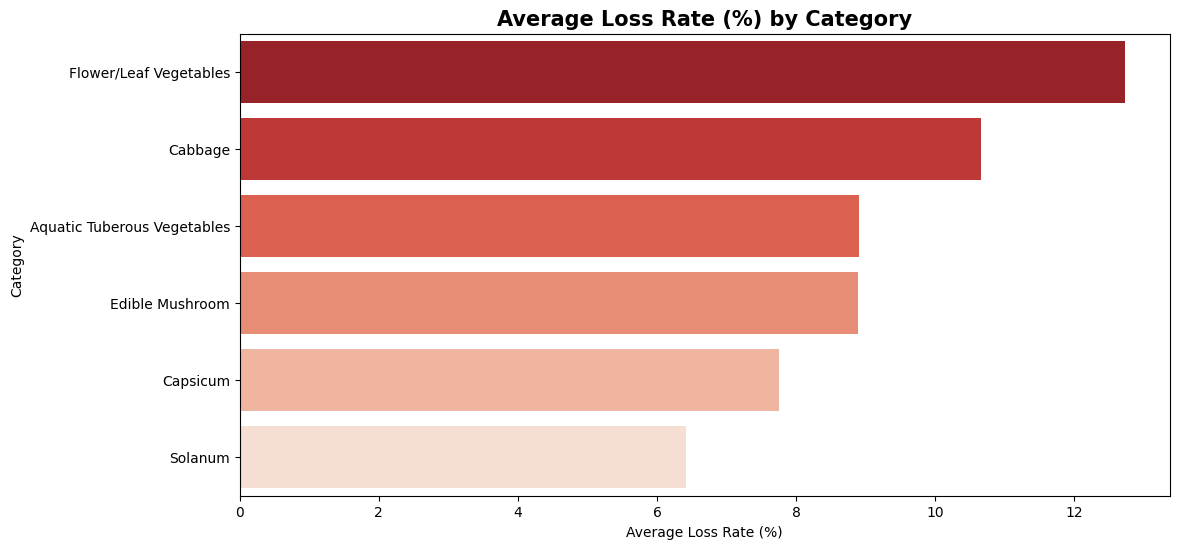

In [10]:
plt.figure(figsize=(12,6))
# Finding average loss rate per category
avg_loss_category = master_df.groupby('Category Name')['Loss Rate (%)'].mean().sort_values(ascending=False)

sns.barplot(x=avg_loss_category.values, y=avg_loss_category.index, palette='Reds_r')
plt.title('Average Loss Rate (%) by Category', fontsize=15, fontweight='bold')
plt.xlabel('Average Loss Rate (%)')
plt.ylabel('Category')
plt.show()

**Insight 4:** *Flower/Leaf Vegetables exhibit the highest average loss rate at approximately 13%, whereas Solanum shows the most stability with the lowest loss at 6.5%. This indicates a critical need for improved handling and storage solutions specifically for highly perishable leafy categories.*

**6. Relationship between Loss Rate and Sales**

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=master_df, x='Quantity Sold (kilo)', y='Loss Rate (%)', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Correlation between Sales Volume and Loss Rate', fontsize=15)
plt.xlabel('Sales Volume')
plt.ylabel('Loss Rate (%)')
plt.show()

**6. Outlier Detection (Boxplot):**

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x=master_df['Quantity Sold (kilo)'], color='lightblue')
plt.title('Detecting Outliers in Sales Volume', fontsize=15)
plt.show()

**Insight 5:** *While low prices drive the highest sales volume, the most popular category (Flower/Leaf Vegetables) suffers from the highest average loss rate of nearly 13%, with significant sales outliers reaching up to 160 units.*

## Conclusion of EDA Phase
1. **Top Sales:** *Flower/Leaf Vegetables* is the leading category.
2. **Seasonality:** Sales show a *fluctuating* trend on specific dates.
3. **Wastage:** *Flower/Leaf Vegetables* has the highest loss rate, requiring better inventory management.
4. **Price Impact:** Most customers prefer items in the lower price range (under 50 units), as shown by the high concentration of sales volume at lower unit prices in our scatter plot.